### TODO
- search delle functional dependency che se sono elevate sono buone per fare imputation

In [34]:
import pandas as pd
import numpy as np
import utility.dirty_completeness as dc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

df_adult = pd.read_csv('../datasets/adult.csv')
df_list_adult = dc.injection(df_adult, 1, 'adult', 'income')

saved adult-completeness50%
saved adult-completeness60%
saved adult-completeness70%
saved adult-completeness80%
saved adult-completeness90%


In [35]:
df_list_adult[0].head(10)

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,Self-emp-not-inc,99185.0,NaN,10.0,Married-civ-spouse,NaN,Husband,NaN,Male,NaN,0.0,40.0,United-States,>50K
1,55.0,NaN,163083.0,NaN,14.0,Married-civ-spouse,NaN,NaN,NaN,NaN,0.0,NaN,40.0,NaN,>50K
2,NaN,Private,NaN,NaN,14.0,Married-civ-spouse,NaN,Husband,White,NaN,NaN,NaN,40.0,NaN,>50K
3,NaN,NaN,208881.0,NaN,NaN,NaN,Craft-repair,Husband,NaN,Male,0.0,0.0,40.0,United-States,<=50K
4,NaN,Private,271446.0,Some-college,10.0,NaN,NaN,NaN,White,Female,0.0,NaN,NaN,NaN,<=50K
5,NaN,NaN,167005.0,NaN,9.0,Married-civ-spouse,Adm-clerical,Husband,White,NaN,NaN,0.0,48.0,United-States,>50K
6,NaN,NaN,36539.0,NaN,NaN,NaN,Exec-managerial,Wife,NaN,NaN,NaN,0.0,40.0,United-States,>50K
7,NaN,Private,NaN,NaN,9.0,NaN,NaN,Not-in-family,White,Male,0.0,NaN,NaN,NaN,<=50K
8,NaN,NaN,NaN,NaN,10.0,Separated,Transport-moving,Not-in-family,NaN,Female,0.0,0.0,30.0,United-States,<=50K
9,38.0,Private,173968.0,NaN,NaN,NaN,Craft-repair,Husband,White,Male,0.0,NaN,45.0,United-States,<=50K


In [36]:
working_df = df_list_adult[1]

In [37]:
working_df['education'].unique()

array([nan, 'Masters', 'Some-college', 'HS-grad', 'Bachelors', '5th-6th',
       '7th-8th', 'Assoc-voc', 'Assoc-acdm', '9th', '12th', 'Prof-school',
       '11th', '10th', 'Doctorate', '1st-4th', 'Preschool'], dtype=object)

In [38]:
working_df[working_df['education'] == 'Some-college']['education-num']

3       10.0
8       10.0
36       NaN
41       NaN
55      10.0
        ... 
2980     NaN
2989     NaN
2991    10.0
2993    10.0
3010    10.0
Name: education-num, Length: 362, dtype: float64

#### here we discovered that education and education-num are perfectly correlated
Therefore imputation here will be done with a simple *functional dependency*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

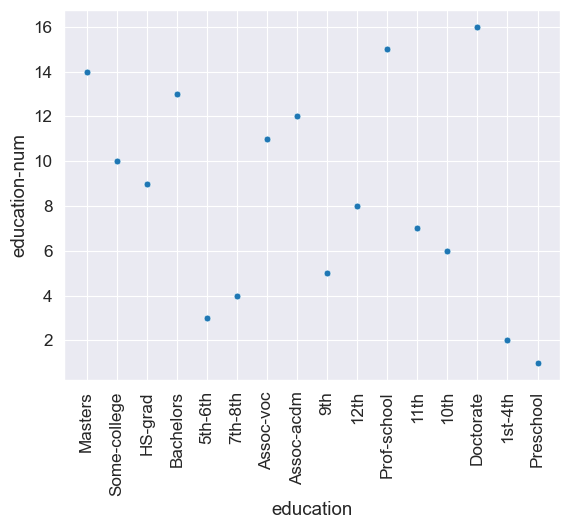

In [39]:
sns.scatterplot(working_df[['education', 'education-num']], x='education', y='education-num')
plt.xticks(rotation=90)

In [40]:
working_df.nunique()

age                  62
workclass             6
fnlwgt             1727
education            16
education-num        16
maritial-status       7
occupation           13
relationship          6
race                  5
sex                   2
capital-gain         43
capital-loss         37
hours-per-week       67
native-country       38
income                2
dtype: int64

By looking at the `nunique()` output and the [Dataset documentation](https://archive.ics.uci.edu/ml/datasets/adult) we can figure out which features are categorical and which are numerical. A good amount of them are numerical but the majority is categorical. We will of course handle them differently in our analysis.


In [41]:
categorical = ['workclass', 'education', 'maritial-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
columns = categorical + numerical

## Simple Imputation

In [42]:
# imputate numerical values using the median
df_numerical = working_df[numerical].copy()

simple_imputer = SimpleImputer(missing_values=np.NaN, strategy='median') #define the imputer model
adult_numerical_imp = simple_imputer.fit_transform(df_numerical) # returns numpy array
df_numerical_imputed = pd.DataFrame(adult_numerical_imp, columns=numerical)
df_numerical_imputed.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,42.0,99185.0,10.0,0.0,0.0,40.0
1,55.0,178417.0,14.0,0.0,0.0,40.0
2,38.0,178417.0,10.0,0.0,0.0,40.0
3,38.0,208881.0,10.0,0.0,0.0,40.0
4,19.0,178417.0,10.0,0.0,0.0,25.0
5,38.0,167005.0,9.0,0.0,0.0,48.0
6,33.0,36539.0,13.0,0.0,0.0,40.0
7,48.0,178417.0,10.0,0.0,0.0,65.0
8,38.0,178417.0,10.0,0.0,0.0,40.0
9,38.0,173968.0,10.0,0.0,0.0,45.0


In [43]:
df_cat = df_list_adult[4][categorical].copy()
df_cat.head(10)

simple_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent') #define the imputer model
adult_categorical_imp = simple_imputer.fit_transform(df_cat) # returns numpy array
df_categorical_imputed = pd.DataFrame(adult_categorical_imp, columns=categorical)
df_categorical_imputed.head(10)

,workclass,education,maritial-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States
5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6,Private,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
7,Private,HS-grad,Divorced,Transport-moving,Not-in-family,White,Male,United-States
8,Private,Some-college,Separated,Transport-moving,Husband,Amer-Indian-Eskimo,Female,United-States
9,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


### Final imputed DataFrame

In [44]:
# concatenate the 2 df
imputed_df = pd.concat([df_numerical_imputed, df_categorical_imputed, working_df['income']], axis=1)

imputed_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,maritial-status,occupation,relationship,race,sex,native-country,income
0,42.0,99185.0,10.0,0.0,0.0,40.0,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
1,55.0,178417.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
2,38.0,178417.0,10.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
3,38.0,208881.0,10.0,0.0,0.0,40.0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
4,19.0,178417.0,10.0,0.0,0.0,25.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,37.0,160910.0,10.0,7298.0,0.0,40.0,Local-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K
3013,38.0,488720.0,5.0,0.0,0.0,40.0,Private,9th,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,United-States,<=50K
3014,37.0,138940.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3015,34.0,225548.0,10.0,0.0,0.0,30.0,Private,Bachelors,Married-civ-spouse,Protective-serv,Husband,Black,Male,United-States,<=50K


Make sure that no missing value is left

In [45]:
imputed_df.isnull().sum().sum()

0

## Accuracy evaluation

In [46]:
from utility.utility import accuracy_assesment

accuracy_assesment([imputed_df], df_adult, columns = columns, numeric_columns=numerical)

[0.964511400194817]

so according to the metric we defined the imputation worked well

---
## Train The ML Model

#### First let's normalize the numerical values

In [47]:
from scipy.stats import zscore
X = zscore(imputed_df[numerical].values)
normalized_df = pd.DataFrame(X, columns=['normalized_' + i for i in numerical])
normalized_df

,normalized_age,normalized_fnlwgt,normalized_education-num,normalized_capital-gain,normalized_capital-loss,normalized_hours-per-week
0,0.357475,-1.045829,-0.026610,-0.117749,-0.158572,-0.049150
1,1.633691,-0.086277,2.005840,-0.117749,-0.158572,-0.049150
2,-0.035207,-0.086277,-0.026610,-0.117749,-0.158572,-0.049150
3,-0.035207,0.282662,-0.026610,-0.117749,-0.158572,-0.049150
4,-1.900446,-0.086277,-0.026610,-0.117749,-0.158572,-1.691901
...,...,...,...,...,...,...
3012,-0.133378,-0.298299,-0.026610,0.945051,-0.158572,-0.049150
3013,-0.035207,3.671697,-2.567172,-0.117749,-0.158572,-0.049150
3014,-0.133378,-0.564370,-1.550947,-0.117749,-0.158572,-0.049150
3015,-0.427889,0.484510,-0.026610,-0.117749,-0.158572,-1.144317


In [49]:
final_df = pd.concat([normalized_df, imputed_df[categorical], working_df['income']], axis=1)
final_df

,normalized_age,normalized_fnlwgt,normalized_education-num,normalized_capital-gain,normalized_capital-loss,normalized_hours-per-week,workclass,education,maritial-status,occupation,relationship,race,sex,native-country,income
0,0.357475,-1.045829,-0.026610,-0.117749,-0.158572,-0.049150,Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
1,1.633691,-0.086277,2.005840,-0.117749,-0.158572,-0.049150,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
2,-0.035207,-0.086277,-0.026610,-0.117749,-0.158572,-0.049150,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
3,-0.035207,0.282662,-0.026610,-0.117749,-0.158572,-0.049150,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
4,-1.900446,-0.086277,-0.026610,-0.117749,-0.158572,-1.691901,Private,Some-college,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,-0.133378,-0.298299,-0.026610,0.945051,-0.158572,-0.049150,Local-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K
3013,-0.035207,3.671697,-2.567172,-0.117749,-0.158572,-0.049150,Private,9th,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,United-States,<=50K
3014,-0.133378,-0.564370,-1.550947,-0.117749,-0.158572,-0.049150,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3015,-0.427889,0.484510,-0.026610,-0.117749,-0.158572,-1.144317,Private,Bachelors,Married-civ-spouse,Protective-serv,Husband,Black,Male,United-States,<=50K


In [ ]:
# transform categorical to one-hot
#one_hot_df = pd.get_dummies(final_df, drop_first=True)
#one_hot_df

In [ ]:
one_hot_df_nonClass = pd.get_dummies(final_df[final_df.columns[:-1]], drop_first=False)
one_hot_df_incomeClass = pd.get_dummies(final_df['income'], drop_first=True)
one_hot_df_nonClass
one_hot_df_incomeClass
one_hot_df = pd.concat([one_hot_df_nonClass, one_hot_df_incomeClass], axis=1)
one_hot_df

,normalized_age,normalized_fnlwgt,normalized_education-num,normalized_capital-gain,normalized_capital-loss,normalized_hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,>50K
0,0.357475,-1.045829,-0.026610,-0.117749,-0.158572,-0.049150,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1.633691,-0.086277,2.005840,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.035207,-0.086277,-0.026610,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.035207,0.282662,-0.026610,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.900446,-0.086277,-0.026610,-0.117749,-0.158572,-1.691901,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,-0.133378,-0.298299,-0.026610,0.945051,-0.158572,-0.049150,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3013,-0.035207,3.671697,-2.567172,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3014,-0.133378,-0.564370,-1.550947,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3015,-0.427889,0.484510,-0.026610,-0.117749,-0.158572,-1.144317,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_df[one_hot_df.columns[:-1]], one_hot_df['>50K'], train_size=0.8, random_state=22, shuffle=True, stratify=one_hot_df['>50K'])
# stratify to make sure that the distribution is the same for train and test target

In [ ]:
X_train

,normalized_age,normalized_fnlwgt,normalized_education-num,normalized_capital-gain,normalized_capital-loss,normalized_hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
1258,-1.507764,-0.086277,-0.534722,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
763,0.161134,-0.086277,-0.026610,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1945,1.241009,1.545380,-0.534722,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1537,-0.035207,-0.086277,-0.534722,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2742,-0.035207,0.652740,-0.026610,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,-0.035207,0.030276,-0.534722,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
256,-1.311423,-0.086277,0.989615,-0.117749,-0.158572,-1.582384,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
338,-0.035207,-0.324615,-1.042835,-0.117749,-0.158572,-0.049150,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1557,-0.035207,-0.086277,-0.026610,1.001846,-0.158572,1.046017,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='>50K', ylabel='Count'>

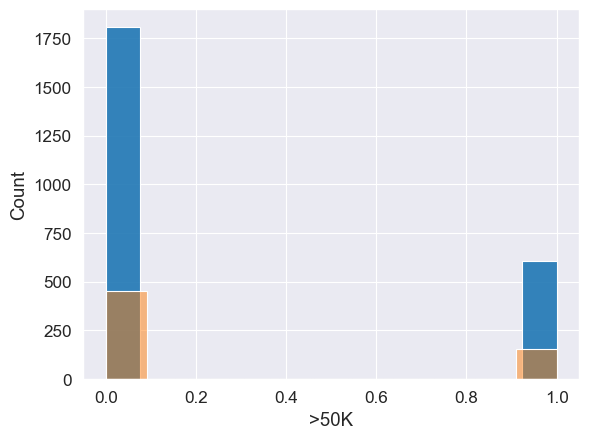

In [ ]:
# check target class distributiuon is preserved between training and testing
sns.histplot(data=y_train, alpha=0.9)
sns.histplot(data=y_test, alpha=0.5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.83      0.84       452
        >50K       0.51      0.53      0.52       152

    accuracy                           0.75       604
   macro avg       0.68      0.68      0.68       604
weighted avg       0.76      0.75      0.76       604

